In [1]:
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

Dataset balanceada. 

In [51]:
# ExTRAEMOS LA DATASET BALANCEADA
# bal_all = np.loadtxt('/content/drive/MyDrive/FYP/A1_A2_A3_B_data/Data_csv/bal_healthy.csv', delimiter=',')
bal_all = np.loadtxt('bal_healthy.csv', delimiter=',') #Healthy. 
bal_ins = np.loadtxt('bal_ins.csv', delimiter=',') #ins 
bal_narco = np.loadtxt('bal_narco.csv', delimiter=',') #narco 
bal_plm = np.loadtxt('bal_plm.csv', delimiter=',') #plm 

In [52]:
#Manejo de la data

x_bal = bal_all[:,0:1024]
y_bal = bal_all[:,1024]
y_bal=y_bal.reshape(-1,1 )

x_ins = bal_ins[:,0:1024]
y_ins = bal_ins[:,1024]
y_ins=y_ins.reshape(-1,1 )

x_narco = bal_narco[:,0:1024]
y_narco = bal_narco[:,1024]
y_narco=y_narco.reshape(-1,1 )

x_plm = bal_plm[:,0:1024]
y_plm = bal_plm[:,1024]
y_plm=y_plm.reshape(-1,1 )




In [53]:
from keras.utils import to_categorical
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_bal)
onehotlabels = enc.transform(y_bal).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_bal, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded = to_categorical(y_test1, num_classes=num_classes)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_ins)
onehotlabels = enc.transform(y_ins).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1_ins, x_test1_ins, y_train1, y_test1 = train_test_split(x_ins, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded_ins = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded_ins = to_categorical(y_test1, num_classes=num_classes)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_narco)
onehotlabels = enc.transform(y_narco).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1_narco, x_test1_narco, y_train1, y_test1 = train_test_split(x_narco, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded_narco = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded_narco = to_categorical(y_test1, num_classes=num_classes)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_plm)
onehotlabels = enc.transform(y_plm).toarray()
onelabel=np.absolute(1-onehotlabels[:,0])
onelabel=(onelabel.reshape(-1,1)).astype(int)
x_train1_plm, x_test1_plm, y_train1, y_test1 = train_test_split(x_plm, onelabel, test_size = 0.2, shuffle = True)
num_classes=2
y_train1_encoded_plm = to_categorical(y_train1, num_classes=num_classes)
y_test1_encoded_plm = to_categorical(y_test1, num_classes=num_classes)


In [54]:
#Imprime la historia. 

import matplotlib.pyplot as plt
def plotaccloss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 6))

    # Plotting training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r*-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [55]:
n_epochs=200
batch_size=100


Modelo 1D-CNN GRU para Ins 

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=16))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(GRU(8, return_sequences=False))  # Utiliza LSTM estándar
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train1_ins, y_train1_encoded_ins, epochs=100, batch_size=batch_size, validation_split=0.3)

loss, accuracy = model.evaluate(x_test1_ins, y_test1_encoded_ins, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')




c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_61 (Conv1D)              │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_62 (Conv1D)              │ (None, 1020, 8)        │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_34 (MaxPooling1D) │ (None, 63, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_63 (Conv1D)              │ (None, 61, 8)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_35 (MaxPooling1D) │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.16 KB)

 Trainable params: 1,834 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.4823 - loss: 0.7409 - val_accuracy: 0.4885 - val_loss: 0.6942
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4799 - loss: 0.6949 - val_accuracy: 0.4960 - val_loss: 0.6934
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5115 - loss: 0.6929 - val_accuracy: 0.4960 - val_loss: 0.6934
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5186 - loss: 0.6923 - val_accuracy: 0.4960 - val_loss: 0.6928
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5044 - loss: 0.6924 - val_accuracy: 0.4960 - val_loss: 0.6925
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5043 - loss: 0.6918 - val_accuracy: 0.4960 - val_loss: 0.6917
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5074 - loss: 0.6913 - val_accuracy: 0.4960 - val_loss: 0.6904
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5074 - loss: 0.6901 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


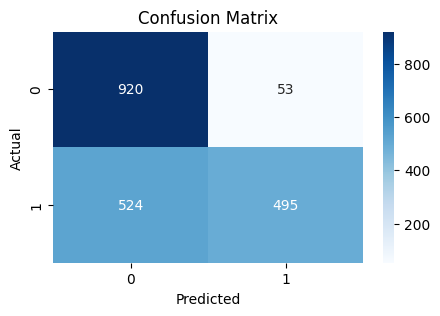

In [57]:
###########################
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Make predictions
y_pred = model.predict(x_test1_ins)
# Step 2: Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")
# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test1_encoded_ins.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


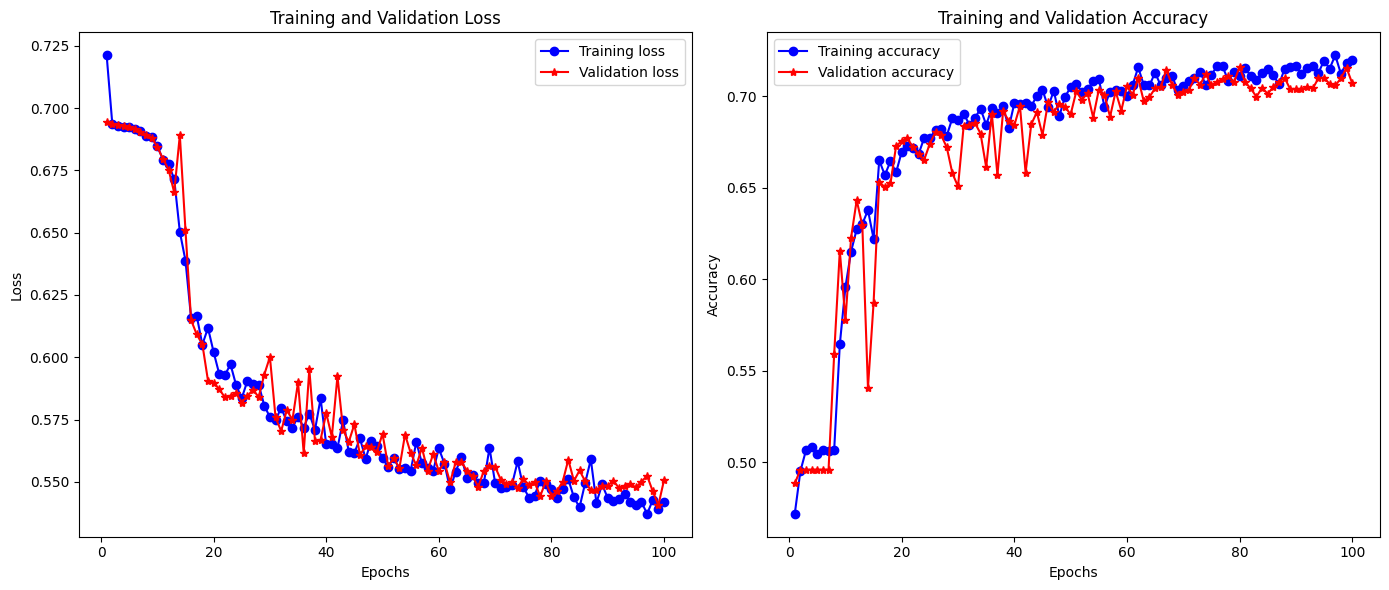

In [58]:
plotaccloss(history)


Modelo 1D-CNN GRU para Narco

In [59]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=16))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(GRU(8, return_sequences=False))  # Utiliza LSTM estándar
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train1_narco, y_train1_encoded_narco, epochs=100, batch_size=batch_size, validation_split=0.3)

loss, accuracy = model.evaluate(x_test1_narco, y_test1_encoded_narco, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_64 (Conv1D)              │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_65 (Conv1D)              │ (None, 1020, 8)        │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_36 (MaxPooling1D) │ (None, 63, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_66 (Conv1D)              │ (None, 61, 8)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_37 (MaxPooling1D) │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.16 KB)

 Trainable params: 1,834 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.5088 - loss: 0.7095 - val_accuracy: 0.4939 - val_loss: 0.6939
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5239 - loss: 0.6932 - val_accuracy: 0.6055 - val_loss: 0.6861
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5237 - loss: 0.6901 - val_accuracy: 0.6042 - val_loss: 0.6845
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5547 - loss: 0.6845 - val_accuracy: 0.5894 - val_loss: 0.6796
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5621 - loss: 0.6817 - val_accuracy: 0.5654 - val_loss: 0.6791
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5652 - loss: 0.6800 - val_accuracy: 0.5235 - val_loss: 0.6829
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5648 - loss: 0.6796 - val_accuracy: 0.5854 - val_loss: 0.6705
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5880 - loss: 0.6720 - val_accuracy: 0

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


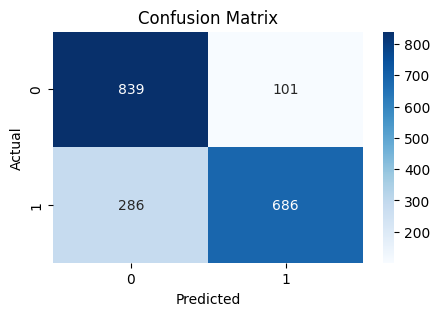

In [60]:
###########################
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 1: Make predictions
y_pred = model.predict(x_test1_narco)
# Step 2: Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")
# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test1_encoded_narco.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


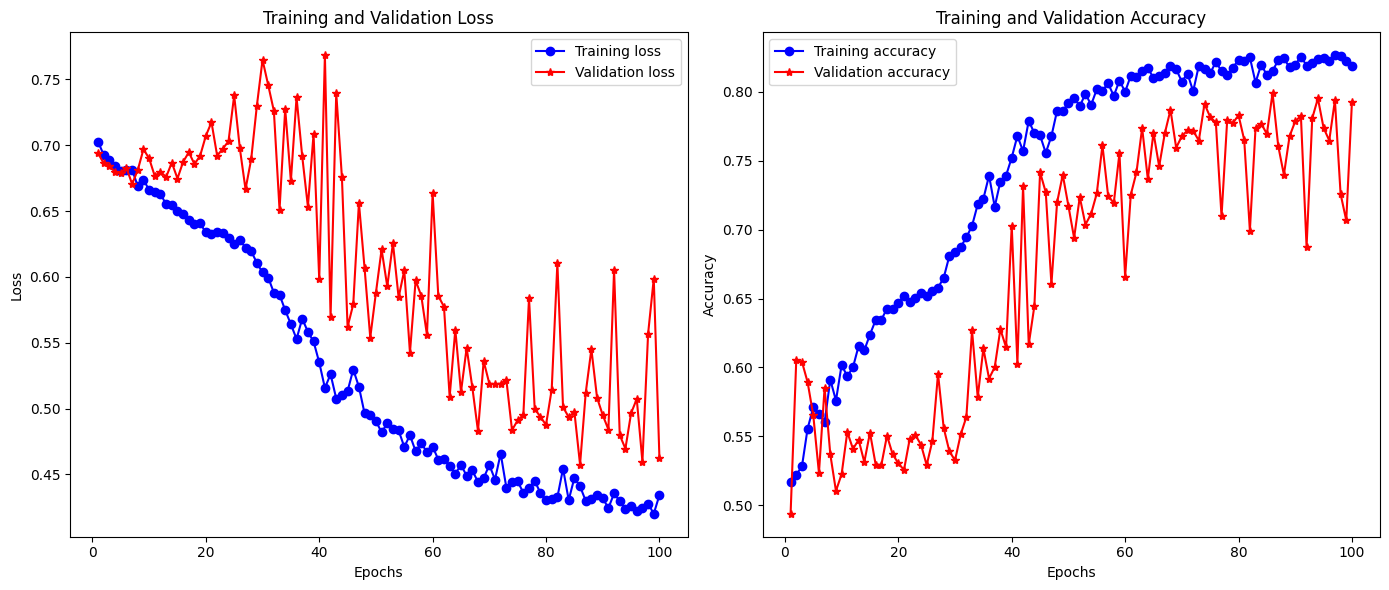

In [61]:
plotaccloss(history)

Modelo 1D-CNN GRU para PLM

In [62]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=16))
model.add(Conv1D(8, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(GRU(8, return_sequences=False))  # Utiliza LSTM estándar
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train1_plm, y_train1_encoded_plm, epochs=100, batch_size=batch_size, validation_split=0.3)

loss, accuracy = model.evaluate(x_test1_plm, y_test1_encoded_plm, verbose=0)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_67 (Conv1D)              │ (None, 1022, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_68 (Conv1D)              │ (None, 1020, 8)        │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_38 (MaxPooling1D) │ (None, 63, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_69 (Conv1D)              │ (None, 61, 8)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_39 (MaxPooling1D) │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 15, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834 (7.16 KB)

 Trainable params: 1,834 (7.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.5102 - loss: 0.7037 - val_accuracy: 0.5487 - val_loss: 0.6916
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5289 - loss: 0.6912 - val_accuracy: 0.5189 - val_loss: 0.6916
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5638 - loss: 0.6863 - val_accuracy: 0.5020 - val_loss: 0.6937
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5780 - loss: 0.6784 - val_accuracy: 0.5020 - val_loss: 0.6942
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6190 - loss: 0.6638 - val_accuracy: 0.5052 - val_loss: 0.7084
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6537 - loss: 0.6324 - val_accuracy: 0.5099 - val_loss: 0.7288
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6772 - loss: 0.6103 - val_accuracy: 0.5120 - val_loss: 0.7290
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.6673 - loss: 0.6183 -

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


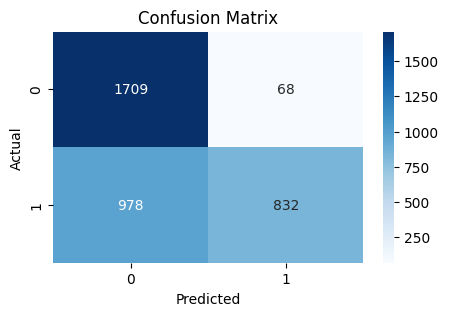

In [63]:
# Step 1: Make predictions
y_pred = model.predict(x_test1_plm)
# Step 2: Convert probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")
# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test1_encoded_plm.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Step 4: Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

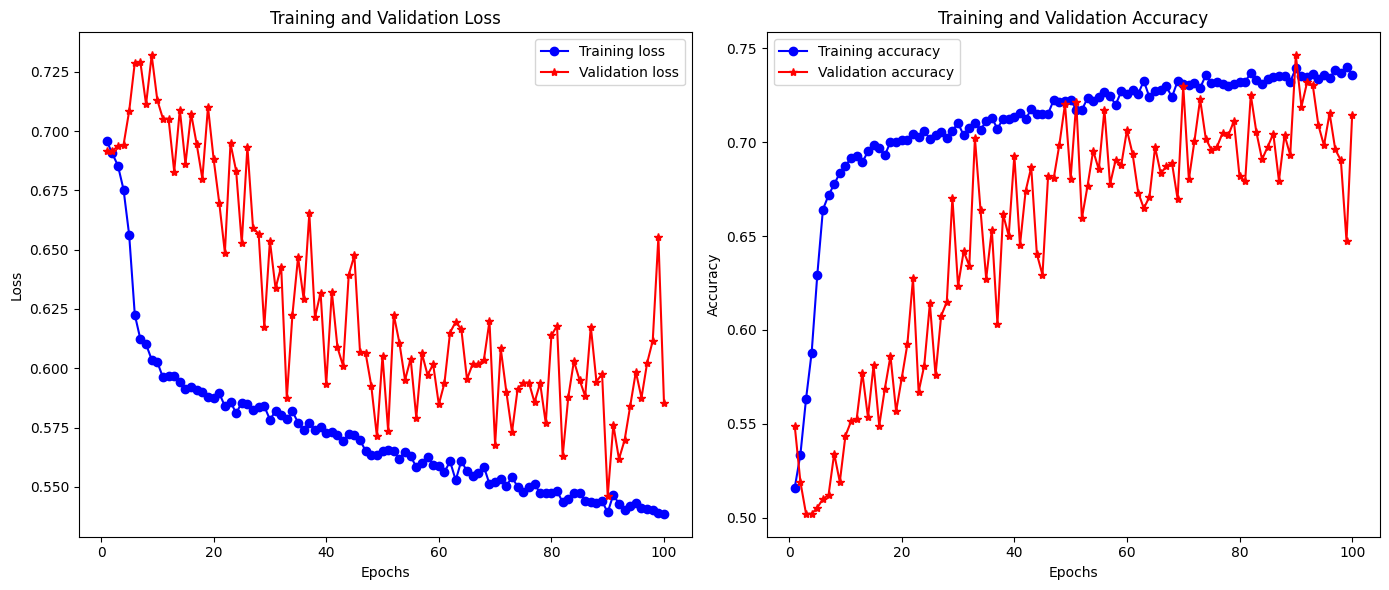

In [64]:
plotaccloss(history)